In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_t = pd.read_csv("../../../Risultati/Electrical_TABULAR/data_imputation_classification.csv")
df_t['percentage']=100-df_t['percentage']
df_t

,percentage,ML,outlier,imputation,r2
0,100,reg,none,none,0.885892
1,100,clf,none,none,0.911818
2,100,reg,none,none,0.883913
3,100,clf,none,none,0.909394
4,100,reg,none,none,0.885728
...,...,...,...,...,...
411,50,clf,none,none,0.848182
412,50,clf,none,drop,0.899696
413,50,clf,none,locf,0.871818
414,50,clf,none,mean,0.890606


In [3]:
df_t_c = df_t[df_t['ML']=='clf']
df_t_c

,percentage,ML,outlier,imputation,r2
1,100,clf,none,none,0.911818
3,100,clf,none,none,0.909394
5,100,clf,none,none,0.911212
7,100,clf,none,none,0.909091
9,100,clf,none,none,0.906970
...,...,...,...,...,...
411,50,clf,none,none,0.848182
412,50,clf,none,drop,0.899696
413,50,clf,none,locf,0.871818
414,50,clf,none,mean,0.890606


In [4]:
df_t_r = df_t[df_t['ML'] == 'reg']
df_t_r

,percentage,ML,outlier,imputation,r2
0,100,reg,none,none,0.885892
2,100,reg,none,none,0.883913
4,100,reg,none,none,0.885728
6,100,reg,none,none,0.886163
8,100,reg,none,none,0.886064
...,...,...,...,...,...
406,50,reg,none,none,0.757471
407,50,reg,none,drop,0.865267
408,50,reg,none,locf,0.767509
409,50,reg,none,mean,0.807880


In [5]:
top_performance = df_t_r[df_t_r['percentage'] == 100]['r2'].mean()
df_t_r['percent_diff'] = (((df_t_r['r2'] - top_performance) / top_performance) * 100).round(2)
tabella = df_t_r.groupby(['outlier', 'imputation', 'percentage']).mean()
tabella['r2'] = tabella['r2'].round(4)
tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['outlier', 'imputation'], columns='percentage',
                        values='percent_diff').reset_index().sort_values(by=[100, 90, 80, 70], ascending=False)
res_tab_r = tabella.iloc[:,:-1]
tabella.to_csv("1_tabular_r.csv")

C:\Users\giosi\AppData\Local\Temp\ipykernel_18896\2638161332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_r['percent_diff'] = (((df_t_r['r2'] - top_performance) / top_performance) * 100).round(2)
C:\Users\giosi\AppData\Local\Temp\ipykernel_18896\2638161332.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabella = df_t_r.groupby(['outlier', 'imputation', 'percentage']).mean()


In [6]:
top_performance = df_t_c[df_t_c['percentage'] == 100]['r2'].mean()
df_t_c['percent_diff'] = (((df_t_c['r2'] - top_performance) / top_performance) * 100).round(2)
tabella = df_t_c.groupby(['outlier', 'imputation', 'percentage']).mean()
tabella['r2'] = tabella['r2'].round(4)
tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['outlier', 'imputation'], columns='percentage',
                        values='percent_diff').reset_index().sort_values(by=[100, 90, 80, 70], ascending=False)
res_tab_c = tabella.iloc[:,:-1]
tabella.to_csv("1_tabular_c.csv")

C:\Users\giosi\AppData\Local\Temp\ipykernel_18896\3448982556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_c['percent_diff'] = (((df_t_c['r2'] - top_performance) / top_performance) * 100).round(2)
C:\Users\giosi\AppData\Local\Temp\ipykernel_18896\3448982556.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabella = df_t_c.groupby(['outlier', 'imputation', 'percentage']).mean()


In [7]:
res_stream_r = pd.read_csv("../1/1_r_n.csv").iloc[:,1:-1]
res_stream_c = pd.read_csv("../1/1_c_n.csv").iloc[:,1:-1]

In [8]:
res_t_c = pd.merge(res_stream_c, res_tab_c, on=['outlier','imputation'])
res_t_c['v_50'] = res_t_c.loc[:,'50']-res_t_c.loc[:,50]
res_t_c['v_60'] = res_t_c.loc[:,'60']-res_t_c.loc[:,60]
res_t_c['v_70'] = res_t_c.loc[:,'70']-res_t_c.loc[:,70]
res_t_c['v_80'] = res_t_c.loc[:,'80']-res_t_c.loc[:,80]
res_t_c['v_90'] = res_t_c.loc[:,'90']-res_t_c.loc[:,90]

In [9]:
res_c = res_t_c.drop(columns=[50,60,70,80,90,'50','60','70','80','90'])

In [10]:
res_c = res_c.round(2)

In [11]:
res_t_r = pd.merge(res_stream_r, res_tab_r, on=['outlier','imputation'])
res_t_r['v_50'] = res_t_r.loc[:,'50']-res_t_r.loc[:,50]
res_t_r['v_60'] = res_t_r.loc[:,'60']-res_t_r.loc[:,60]
res_t_r['v_70'] = res_t_r.loc[:,'70']-res_t_r.loc[:,70]
res_t_r['v_80'] = res_t_r.loc[:,'80']-res_t_r.loc[:,80]
res_t_r['v_90'] = res_t_r.loc[:,'90']-res_t_r.loc[:,90]

In [12]:
res_r = res_t_r.drop(columns=[50,60,70,80,90,'50','60','70','80','90'])

In [13]:
res_r = res_r.round(2)

In [14]:
res_c.to_csv("1_comparison_c.csv")
res_r.to_csv("1_comparison_r.csv")

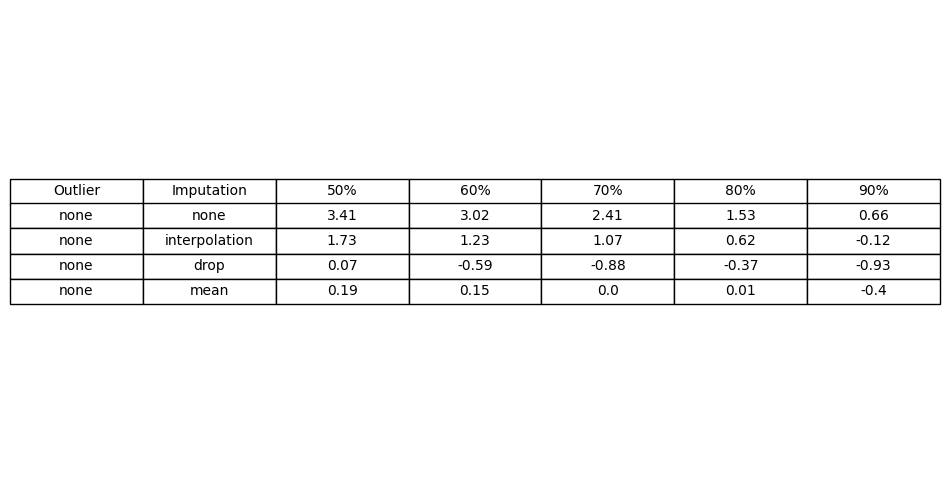

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

# Function to color based on different data types
def color_cell(value):
    try:
        value = float(value)
        if value < 0:
            return 'red'
        elif value > 0:
            return 'green'
    except ValueError:
        pass  # If not a number, don't color

cell_text = []  # Data for cells
colors = []
for row in range(len(res_c)):
    row_data = []
    row_colors = []
    for val in res_c.iloc[row]:
        color = color_cell(val)
        row_data.append(f'{val}')
        row_colors.append(color)
    cell_text.append(row_data)
    colors.append(row_colors)

table = ax.table(cellText=cell_text, colLabels=['Outlier','Imputation','50%','60%','70%','80%','90%'], loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Adjust the table size if needed

ax.axis('off')  # Turn off the axis

plt.show()

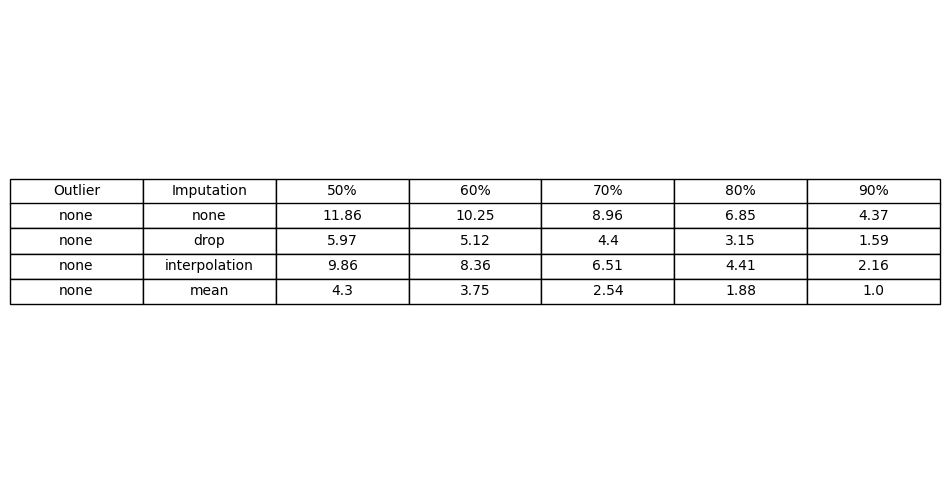

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

# Function to color based on different data types
def color_cell(value):
    try:
        value = float(value)
        if value < 0:
            return 'red'
        elif value > 0:
            return 'green'
    except ValueError:
        pass  # If not a number, don't color

cell_text = []  # Data for cells
colors = []
for row in range(len(res_r)):
    row_data = []
    row_colors = []
    for val in res_r.iloc[row]:
        color = color_cell(val)
        row_data.append(f'{val}')
        row_colors.append(color)
    cell_text.append(row_data)
    colors.append(row_colors)

table = ax.table(cellText=cell_text, colLabels=['Outlier','Imputation','50%','60%','70%','80%','90%'], loc='center', cellLoc='center', cellColours=colors)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Adjust the table size if needed

ax.axis('off')  # Turn off the axis

plt.show()